Class Proportions:
Negatives: 147 Positives: 422


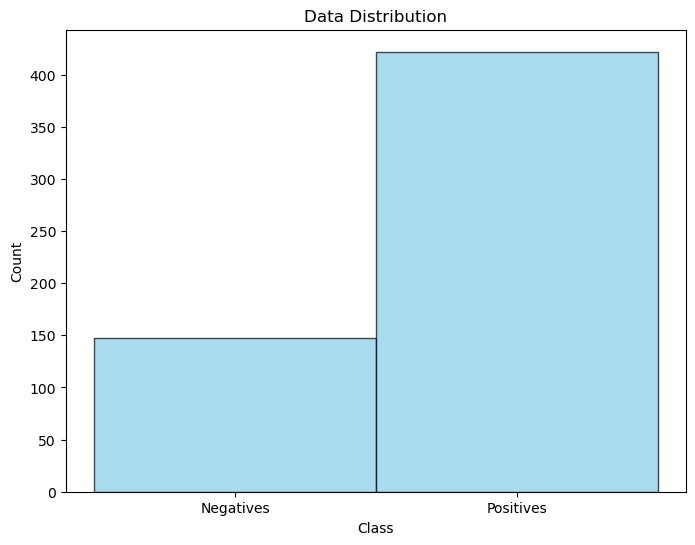

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = "/Users/yanthraa/Desktop/PROJECT/NEW DATASET/archive"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Negatives and Positives)
for class_name in ['Negatives', 'Positives']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Negativesize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Negatives, 1 for Positives) to the labels list
        labels.append(0 if class_name == 'Negatives' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Negatives:", np.sum(labels == 0), "Positives:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Negatives', 'Positives'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


In [6]:
pip install imgaug


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 948.0/948.0 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 17.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Class Proportions:
Negatives: 1000 Positives: 1000


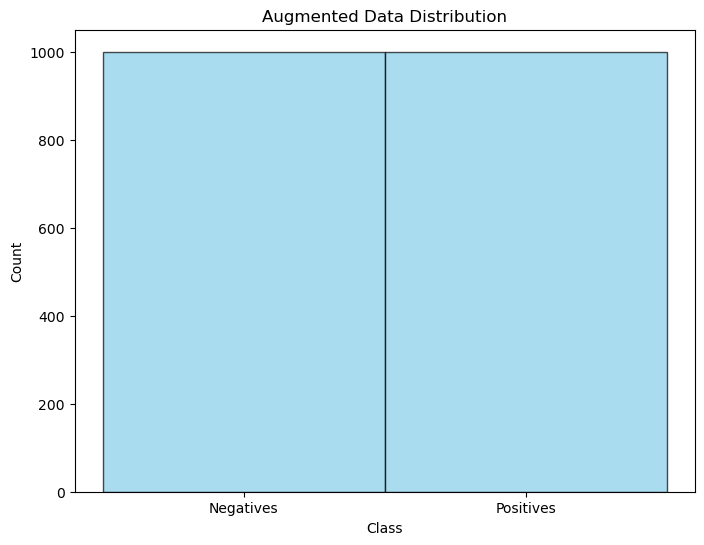

In [8]:
import os
import cv2
import numpy as np
import imgaug.augmenters as iaa
import matplotlib.pyplot as plt

# Define constants
data_path = "/Users/yanthraa/Desktop/PROJECT/NEW DATASET/archive"
target_size = (224, 224)
target_count = 1000  # Desired number of images per class

# Define augmentation sequence
augmenters = iaa.Sequential([
    iaa.Fliplr(0.5),  # Horizontal flip
    iaa.Affine(rotate=(-15, 15)),  # Rotate between -15 and 15 degrees
    iaa.GaussianBlur(sigma=(0.0, 1.0)),  # Apply Gaussian blur
    iaa.AdditiveGaussianNoise(scale=(0, 0.05*255)),  # Add noise
    iaa.Multiply((0.8, 1.2))  # Brightness adjustments
])

# Load and preprocess data
images = []
labels = []

for class_name in ['Negatives', 'Positives']:
    class_path = os.path.join(data_path, class_name)
    class_images = []
    label = 0 if class_name == 'Negatives' else 1
    
    # Load original images
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, target_size)
        img = img.astype(np.float32) / 255.0
        class_images.append(img)
    
    # Augment images until target count is reached
    while len(class_images) < target_count:
        augmented_images = augmenters(images=class_images[:min(len(class_images), target_count - len(class_images))])
        class_images.extend(augmented_images)
    
    class_images = class_images[:target_count]  # Trim excess
    images.extend(class_images)
    labels.extend([label] * target_count)

# Convert to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("Negatives:", np.sum(labels == 0), "Positives:", np.sum(labels == 1))

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['Negatives', 'Positives'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Augmented Data Distribution')
plt.show()


In [10]:
# Separate data for Negatives and Positives classes
Negatives_images = images[labels == 0][:500]
Positives_images = images[labels == 1][:500]
Negatives_labels = labels[labels == 0][:500]
Positives_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([Negatives_images, Positives_images])
balanced_labels = np.concatenate([Negatives_labels, Positives_labels])


# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

# Split the training data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.1, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("Negatives_images:",Negatives_images.shape)
print("Positives_images:",Positives_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
Negatives_images: (500, 224, 224)
Positives_images: (500, 224, 224)
X_train shape: (720, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (720,)
y_test shape: (200,)



Training Logistic Regression...


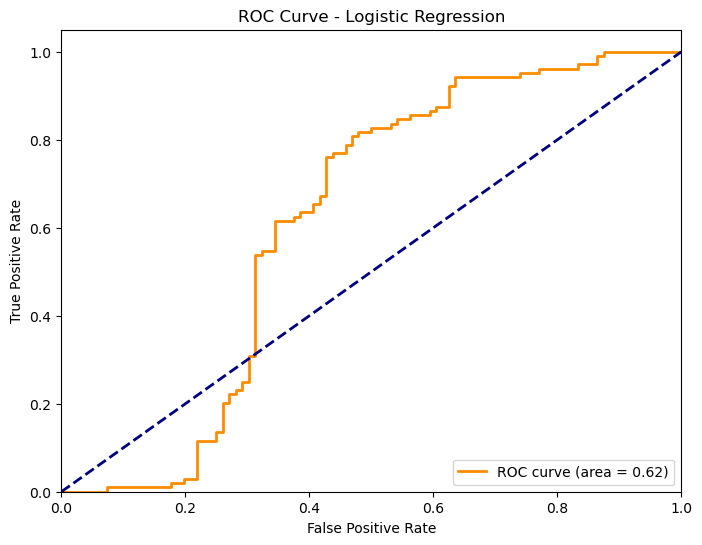


Metrics for Logistic Regression:
Accuracy: 0.6400
Precision: 0.6067
Recall: 0.8750
F1 Score: 0.7165
Confusion Matrix:
[[37 59]
 [13 91]]
Cohen's Kappa: 0.2653
Matthews Correlation: 0.3005
Balanced Accuracy: 0.6302
ROC AUC: 0.6165
Execution Time: 0.60 seconds


Training Random Forest...


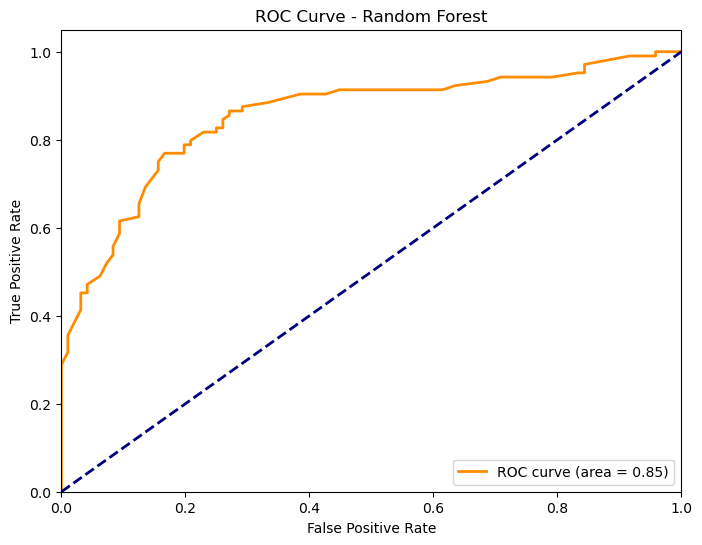


Metrics for Random Forest:
Accuracy: 0.7950
Precision: 0.7944
Recall: 0.8173
F1 Score: 0.8057
Confusion Matrix:
[[74 22]
 [19 85]]
Cohen's Kappa: 0.5888
Matthews Correlation: 0.5891
Balanced Accuracy: 0.7941
ROC AUC: 0.8548
Execution Time: 0.34 seconds


Training SVM...


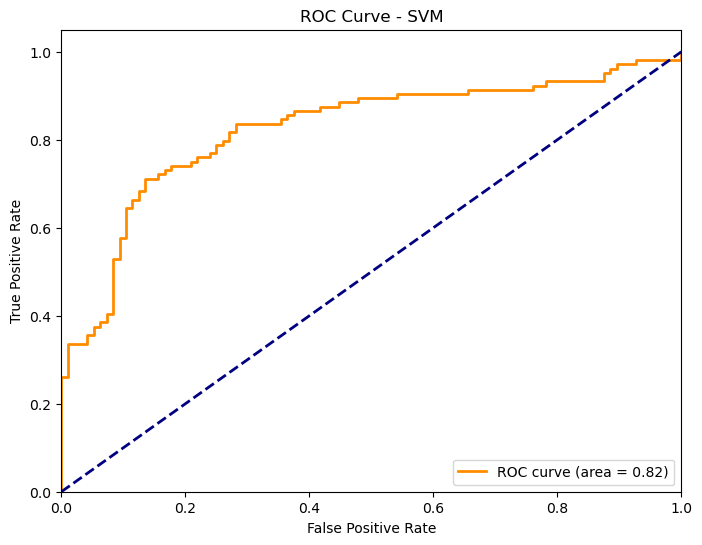


Metrics for SVM:
Accuracy: 0.7200
Precision: 0.6765
Recall: 0.8846
F1 Score: 0.7667
Confusion Matrix:
[[52 44]
 [12 92]]
Cohen's Kappa: 0.4318
Matthews Correlation: 0.4566
Balanced Accuracy: 0.7131
ROC AUC: 0.8239
Execution Time: 35.50 seconds


Training KNN...


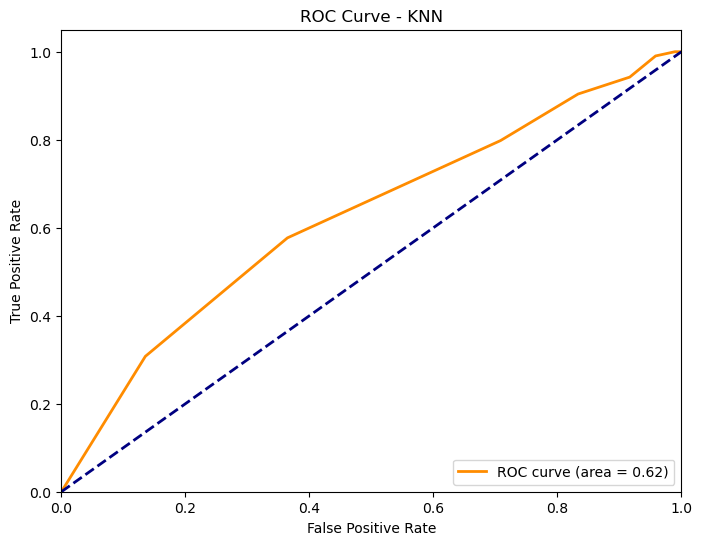


Metrics for KNN:
Accuracy: 0.5300
Precision: 0.5269
Recall: 0.9423
F1 Score: 0.6759
Confusion Matrix:
[[ 8 88]
 [ 6 98]]
Cohen's Kappa: 0.0265
Matthews Correlation: 0.0502
Balanced Accuracy: 0.5128
ROC AUC: 0.6236
Execution Time: 3.13 seconds


Metrics saved to 'model_comparison_metrics.csv'


In [12]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import time
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                           confusion_matrix, cohen_kappa_score, matthews_corrcoef,
                           balanced_accuracy_score, roc_curve, auc)
import pandas as pd

def reshape_data(X_train, X_test, X_valid):
    # Flatten the images
    X_train_flat = X_train.reshape(X_train.shape[0], -1)
    X_test_flat = X_test.reshape(X_test.shape[0], -1)
    X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)
    X_valid_scaled = scaler.transform(X_valid_flat)
    
    return X_train_scaled, X_test_scaled, X_valid_scaled

def evaluate_model(model, X_test, y_test, model_name):
    start_time = time.time()
    
    # Make predictions
    predicted_labels = model.predict(X_test)
    predicted_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    kappa = cohen_kappa_score(y_test, predicted_labels)
    mcc = matthews_corrcoef(y_test, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)
    
    # Get confusion matrix components
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate execution time
    execution_time = time.time() - start_time
    
    # Create metrics dictionary
    metrics_dict = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'Cohen\'s Kappa': [kappa],
        'Matthews Correlation': [mcc],
        'Balanced Accuracy': [balanced_accuracy],
        'True Positives': [tp],
        'True Negatives': [tn],
        'False Positives': [fp],
        'False Negatives': [fn],
        'ROC AUC': [roc_auc],
        'Execution Time (s)': [execution_time]
    }
    
    # Print metrics
    print(f"\nMetrics for {model_name}:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Matthews Correlation: {mcc:.4f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Execution Time: {execution_time:.2f} seconds\n')
    
    return pd.DataFrame(metrics_dict)

# Reshape and scale the data
X_train_scaled, X_test_scaled, X_valid_scaled = reshape_data(X_train, X_test, X_valid)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=9)
}

# Train and evaluate models
all_metrics = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    metrics_df = evaluate_model(model, X_test_scaled, y_test, name)
    all_metrics.append(metrics_df)

# Combine all metrics into a single DataFrame
final_metrics_df = pd.concat(all_metrics, ignore_index=True)

# Save metrics to CSV
final_metrics_df.to_csv('Ml_model_metrics.csv', index=False)
print("\nMetrics saved to 'model_comparison_metrics.csv'")

In [13]:
final_metrics_df

,Model,Accuracy,Precision,Recall,F1 Score,Cohen's Kappa,Matthews Correlation,Balanced Accuracy,True Positives,True Negatives,False Positives,False Negatives,ROC AUC,Execution Time (s)
0,Logistic Regression,0.640,0.606667,0.875000,0.716535,0.265306,0.300463,0.630208,91,37,59,13,0.616486,0.603649
1,Random Forest,0.795,0.794393,0.817308,0.805687,0.588849,0.589115,0.794071,85,74,22,19,0.854768,0.335945
2,SVM,0.720,0.676471,0.884615,0.766667,0.431818,0.456552,0.713141,92,52,44,12,0.823918,35.500125
3,KNN,0.530,0.526882,0.942308,0.675862,0.026512,0.050207,0.512821,98,8,88,6,0.623598,3.129241


In [14]:
pip install xgboost lightgbm catboost

Note: you may need to restart the kernel to use updated packages.



Training AdaBoost...


/opt/anaconda3/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


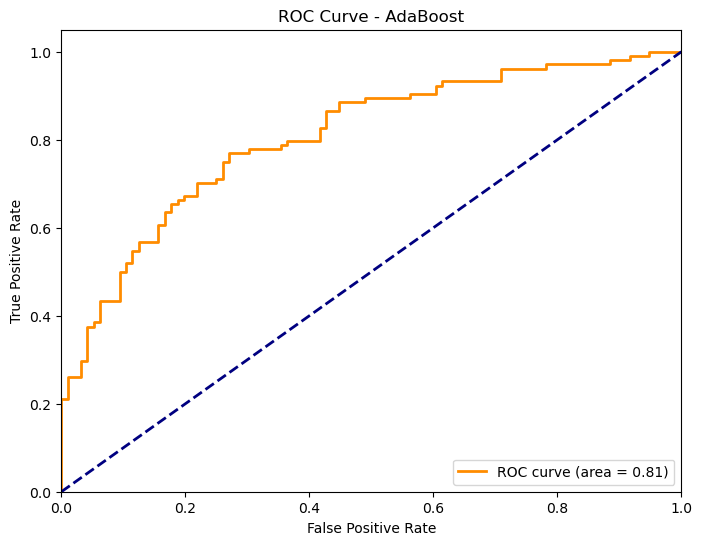


Metrics for AdaBoost:
Accuracy: 0.7450
Precision: 0.7524
Recall: 0.7596
F1 Score: 0.7560
Confusion Matrix:
[[70 26]
 [25 79]]
Cohen's Kappa: 0.4890
Matthews Correlation: 0.4890
Balanced Accuracy: 0.7444
ROC AUC: 0.8068
Execution Time: 0.90 seconds


Training XGBoost...


/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [19:35:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


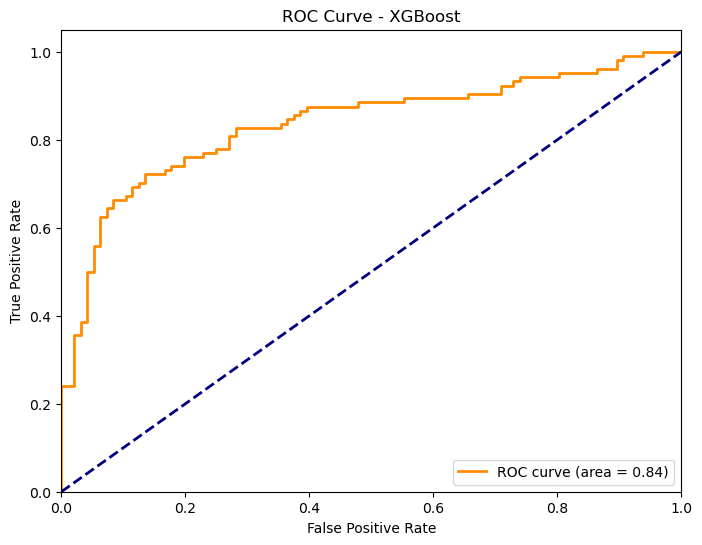


Metrics for XGBoost:
Accuracy: 0.7600
Precision: 0.7642
Recall: 0.7788
F1 Score: 0.7714
Confusion Matrix:
[[71 25]
 [23 81]]
Cohen's Kappa: 0.5188
Matthews Correlation: 0.5189
Balanced Accuracy: 0.7592
ROC AUC: 0.8367
Execution Time: 0.22 seconds


Training LightGBM...
[LightGBM] [Info] Number of positive: 357, number of negative: 363
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 1.412135 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11819115
[LightGBM] [Info] Number of data points in the train set: 720, number of used features: 50176
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.495833 -> initscore=-0.016667
[LightGBM] [Info] Start training from score -0.016667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

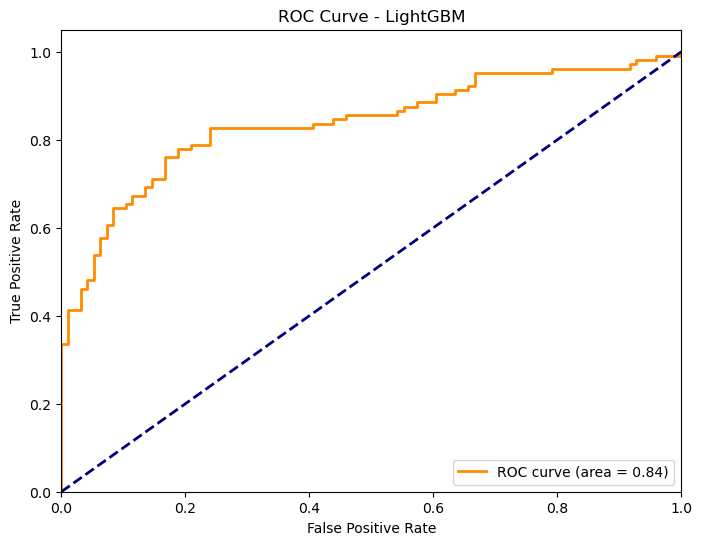


Metrics for LightGBM:
Accuracy: 0.7900
Precision: 0.7870
Recall: 0.8173
F1 Score: 0.8019
Confusion Matrix:
[[73 23]
 [19 85]]
Cohen's Kappa: 0.5787
Matthews Correlation: 0.5791
Balanced Accuracy: 0.7889
ROC AUC: 0.8387
Execution Time: 0.18 seconds


Training CatBoost...


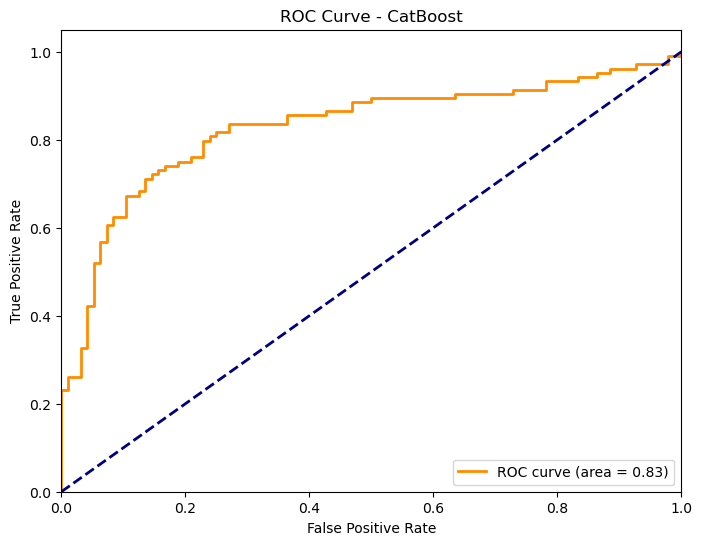


Metrics for CatBoost:
Accuracy: 0.7800
Precision: 0.7830
Recall: 0.7981
F1 Score: 0.7905
Confusion Matrix:
[[73 23]
 [21 83]]
Cohen's Kappa: 0.5589
Matthews Correlation: 0.5591
Balanced Accuracy: 0.7792
ROC AUC: 0.8287
Execution Time: 0.17 seconds


Metrics saved to 'boosting_model_metrics.csv'


In [15]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           confusion_matrix, cohen_kappa_score, matthews_corrcoef,
                           balanced_accuracy_score, roc_curve, auc)

def reshape_data(X_train, X_test, X_valid):
    """Reshape and scale the input data."""
    # Flatten the images if dealing with image data
    if len(X_train.shape) > 2:
        X_train_flat = X_train.reshape(X_train.shape[0], -1)
        X_test_flat = X_test.reshape(X_test.shape[0], -1)
        X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
    else:
        X_train_flat = X_train
        X_test_flat = X_test
        X_valid_flat = X_valid
    
    # Scale the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_flat)
    X_test_scaled = scaler.transform(X_test_flat)
    X_valid_scaled = scaler.transform(X_valid_flat)
    
    return X_train_scaled, X_test_scaled, X_valid_scaled

def evaluate_model(model, X_test, y_test, model_name):
    """Evaluate model performance with multiple metrics."""
    start_time = time.time()
    
    # Make predictions
    if isinstance(model, (xgb.XGBClassifier, lgb.LGBMClassifier, CatBoostClassifier)):
        predicted_probabilities = model.predict_proba(X_test)[:, 1]
        predicted_labels = (predicted_probabilities > 0.5).astype(int)
    else:
        predicted_labels = model.predict(X_test)
        predicted_probabilities = model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predicted_labels)
    precision = precision_score(y_test, predicted_labels)
    recall = recall_score(y_test, predicted_labels)
    f1 = f1_score(y_test, predicted_labels)
    conf_matrix = confusion_matrix(y_test, predicted_labels)
    kappa = cohen_kappa_score(y_test, predicted_labels)
    mcc = matthews_corrcoef(y_test, predicted_labels)
    balanced_accuracy = balanced_accuracy_score(y_test, predicted_labels)
    
    # Get confusion matrix components
    tn, fp, fn, tp = conf_matrix.ravel()
    
    # ROC Curve
    fpr, tpr, thresholds = roc_curve(y_test, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC Curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()
    
    # Calculate execution time
    execution_time = time.time() - start_time
    
    # Create metrics dictionary
    metrics_dict = {
        'Model': [model_name],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1 Score': [f1],
        'Cohen\'s Kappa': [kappa],
        'Matthews Correlation': [mcc],
        'Balanced Accuracy': [balanced_accuracy],
        'True Positives': [tp],
        'True Negatives': [tn],
        'False Positives': [fp],
        'False Negatives': [fn],
        'ROC AUC': [roc_auc],
        'Execution Time (s)': [execution_time]
    }
    
    # Print metrics
    print(f"\nMetrics for {model_name}:")
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print(f'Cohen\'s Kappa: {kappa:.4f}')
    print(f'Matthews Correlation: {mcc:.4f}')
    print(f'Balanced Accuracy: {balanced_accuracy:.4f}')
    print(f'ROC AUC: {roc_auc:.4f}')
    print(f'Execution Time: {execution_time:.2f} seconds\n')
    
    return pd.DataFrame(metrics_dict)

# Reshape and scale the data
X_train_scaled, X_test_scaled, X_valid_scaled = reshape_data(X_train, X_test, X_valid)

# Initialize boosting models with reasonable default parameters
models = {
    'AdaBoost': AdaBoostClassifier(
        n_estimators=100,
        learning_rate=1.0,
        random_state=42
    ),
    # 'Gradient Boosting': GradientBoostingClassifier(
    #     n_estimators=100,
    #     learning_rate=0.1,
    #     max_depth=3,
    #     random_state=42
    # ),
    'XGBoost': xgb.XGBClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'LightGBM': lgb.LGBMClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    ),
    'CatBoost': CatBoostClassifier(
        iterations=100,
        learning_rate=0.1,
        depth=3,
        random_state=42,
        verbose=False
    )
}

# Train and evaluate models
all_metrics = []
for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    metrics_df = evaluate_model(model, X_test_scaled, y_test, name)
    all_metrics.append(metrics_df)

# Combine all metrics into a single DataFrame
final_metrics_df = pd.concat(all_metrics, ignore_index=True)

# Save metrics to CSV
final_metrics_df.to_csv('boosting_model_metrics.csv', index=False)
print("\nMetrics saved to 'boosting_model_metrics.csv'")